# Machine Learning Model
**Implementing 2 different machine learning algorithms**
*   Stochastic Gradient Descent
*   ID3 Decision Tree






In [1]:
# libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import array

In [2]:
basePath = "C:/Users/muthy/Desktop/JUPYTER NOTEBOOK CODES/Machine Learning Model/MLData/"

#Stochastic Gradient Descent
**Data Files uses for the gradient descent algorithm implementation**
*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'


In [3]:
# Data file name variables
gd_train = basePath + "gd-train.dat"
gd_test = basePath + "gd-test.dat"


In [4]:
# Read the training and testing data files
# Read the training and testing data files
def read_data(filename):
    content = []
    #open the file and read each line
    with open(filename, 'r') as file:
        #avoid first line
        lines = file.readlines()
        #for loop to split the values
        for line in lines[1:]:
            val = line.strip().split()
            if(len(val) < 2):
                #avoid if there it is not multiple values in a single line
                continue
            attribute = [int(value) for value in val[:-1]]
            label = int(val[-1])
            content.append((attribute, label))
    return content

In [5]:
# Testing to check if the read_data() is working correctly
# Printing the file content , as well as the length of the list created to make sure all the rows ( except header ) were read using the function made

trainingContent = read_data(gd_train)
print("Training Data: " + str(len(trainingContent)) + " Rows \n")
for i in range (len(trainingContent)):
  print(trainingContent[i])
  print("\n")


testingContent = read_data(gd_test)
print("Testing Data: " + str(len(testingContent)) +  " Rows \n")
for i in range (len(testingContent)):
  print(testingContent[i])
  print("\n")


Training Data: 100 Rows 

([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], 0)


([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], 0)


([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 0)


([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], 0)


([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], 0)


([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], 0)


([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], 0)


([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 0)


([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1], 0)


([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], 0)


([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 0)


([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], 0)


([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], 0)


([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 0)


([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], 1)


([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], 0)


([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], 0)


([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], 0)


([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], 1)


([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], 0)


([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [6]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented

    return 1/(1+np.exp(-h))
    # Taken from https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python

In [7]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def trainFunction(train_data, learning_rate=0.05):
    # initialize weights to 0
    numFeatures = len(train_data[0][0])
    weights = np.zeros(numFeatures + 1)
    # go through each training data instance
    for instance in train_data:
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        x = np.array(instance[0]+[1.0])
        y = instance[1]
        # obtain h(x)
        h = np.dot(weights,x)
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
        for i in range(len(weights)):
          weights[i] += (x[i] * learning_rate * (y-z))

    # return the final learnt weights
    return weights


In [8]:
# Testing the trainFunction
learning_rate = 0.05
GDtrain = read_data(gd_train)
weights = trainFunction(GDtrain, learning_rate)
for i in range(len(weights)):
  print(weights[i])
  print("\n")


-0.2216631548197246


-0.15768115583167744


-0.22689191279299362


-0.1565773947293798


-0.05470236177489726


-0.1247990091360802


-0.44404179799344634


-0.051794618751783074


0.153432159889928


0.15127215441780237


-0.021701584656149554


-0.3247522335503275


-0.17432940165708585


-0.17432940165708585




In [9]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def testFunction(test_data, weights, threshold):

  predictions = 0
  total = len(test_data)

  # go through each testing data instance
  for instance in test_data:
    # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
    x = np.array(instance[0] + [1.0])
    y = instance[1]
    # obtain h(x)
    h = np.dot(weights,x)
    # call the activation function with 'h' as parameter to obtain 'z'
    z = activation_function(h)
    # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
    if z == threshold:
      z = 1
    else:
      z = 0
    # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    if z == y :
      predictions = predictions + 1
    accuracy = predictions / total
  # return the accuracy value for the given test dataset
  return accuracy


In [10]:
# testing the testFunction() using the weights found in previous trainFunction()
GDtest = read_data(gd_test)
accuracy = testFunction(GDtest, weights, threshold = 0.5)
print(accuracy)

0.7225


In [11]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
  # call the train function to train the model and obtain the weights
  weights = trainFunction(df_train,learning_rate)
  # call the test function with the training dataset to obtain the training accuracy
  trainAccuracy = testFunction(df_train, weights, threshold)
  # call the test function with the testing dataset to obtain the testing accuracy
  testAccuracy = testFunction(df_test, weights, threshold)
  # return (trainAccuracy, testAccuracy)
  return trainAccuracy, testAccuracy


In [12]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5

In [13]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]

# Array holding the learning_rate values from 0.05 to 1 with 0.05 increments
learning_rates = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

# Reading the content from training file
dataTrain = read_data(gd_train)

# Reading the content from testing file
dataTest = read_data(gd_test)

# Arrays initlized which will append the accuarcy values for training and testing (these arrays will be used in the extra credit part to make the accuracy plot)
train_accuracy_results = []
test_accuracy_results = []

# FOR Loop that iterates through the learning_rates array and calls the gradient_descent function for each learning rate from 0.05 to 1.
for learning_rate in learning_rates:

  # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
  trainAccuracy, testAccuracy = gradient_descent(dataTrain, dataTest, learning_rate, threshold)

  # Append the Train Accuracy and Test Accuracy , needed for the extra credit accuracy plot
  train_accuracy_results.append(trainAccuracy)
  test_accuracy_results.append(testAccuracy)

  # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
  print(f"Accuracy for LR of {learning_rate} on Training set = {trainAccuracy *100:.2f}%")
  print(f"Accuracy for LR of {learning_rate} on Testing set = {testAccuracy* 100:.2f}%")

Accuracy for LR of 0.05 on Training set = 68.00%
Accuracy for LR of 0.05 on Testing set = 72.25%
Accuracy for LR of 0.1 on Training set = 68.00%
Accuracy for LR of 0.1 on Testing set = 72.25%
Accuracy for LR of 0.15 on Training set = 68.00%
Accuracy for LR of 0.15 on Testing set = 72.25%
Accuracy for LR of 0.2 on Training set = 68.00%
Accuracy for LR of 0.2 on Testing set = 72.25%
Accuracy for LR of 0.25 on Training set = 68.00%
Accuracy for LR of 0.25 on Testing set = 72.25%
Accuracy for LR of 0.3 on Training set = 68.00%
Accuracy for LR of 0.3 on Testing set = 72.25%
Accuracy for LR of 0.35 on Training set = 68.00%
Accuracy for LR of 0.35 on Testing set = 72.25%
Accuracy for LR of 0.4 on Training set = 68.00%
Accuracy for LR of 0.4 on Testing set = 72.25%
Accuracy for LR of 0.45 on Training set = 68.00%
Accuracy for LR of 0.45 on Testing set = 72.25%
Accuracy for LR of 0.5 on Training set = 68.00%
Accuracy for LR of 0.5 on Testing set = 72.25%
Accuracy for LR of 0.55 on Training set 

##Accuracy Plots




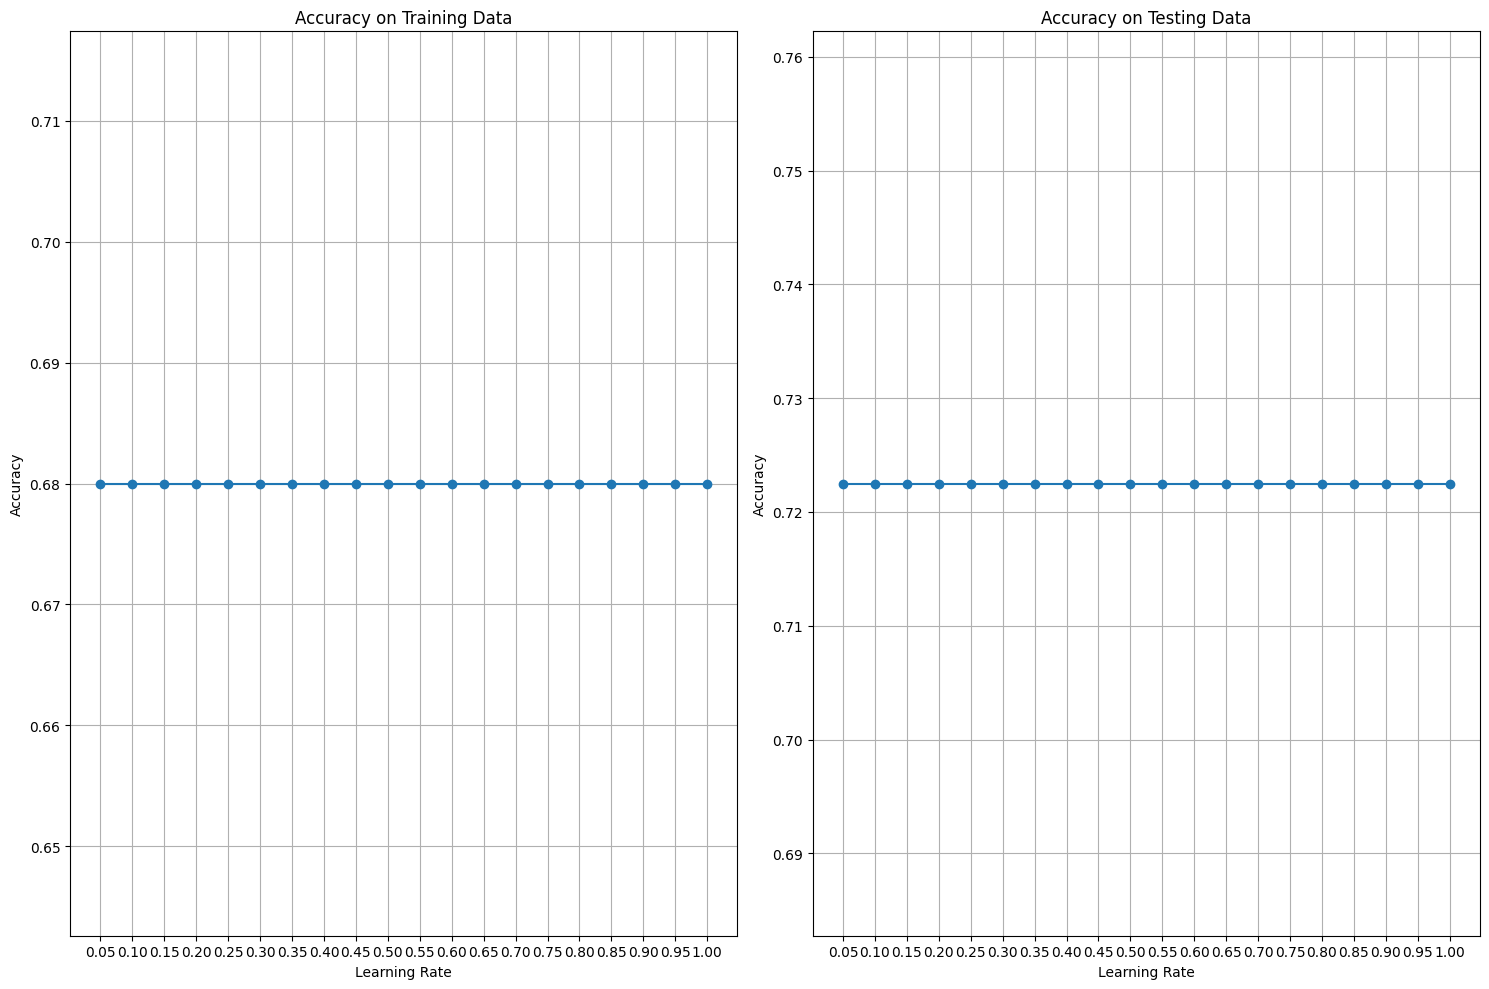

In [14]:
# Graphs for accuracy results.
# One for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.

# Figure size
plt.figure(figsize=(15, 10))

# Training data
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_accuracy_results, marker='o')
plt.title('Accuracy on Training Data')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.grid(True)

# Testing data
plt.subplot(1, 2, 2)
plt.plot(learning_rates, test_accuracy_results, marker='o')
plt.title('Accuracy on Testing Data')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.grid(True)


plt.tight_layout()
plt.show()




#ID3 Decision Tree
**Data Files uses for the ID3 algorithm implementation**
*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'


In [15]:
# Data file name variables
id_train = basePath + "id3-train.dat"
id_test = basePath + "id3-test.dat"


In [16]:
# Reading Data Files
train_data = pd.read_csv(id_train, delim_whitespace=True)
test_data = pd.read_csv(id_test, delim_whitespace=True)

C:\Users\muthy\AppData\Local\Temp\ipykernel_24696\1534913238.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(id_train, delim_whitespace=True)
C:\Users\muthy\AppData\Local\Temp\ipykernel_24696\1534913238.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(id_test, delim_whitespace=True)


In [17]:
# The Node class represents a node in the decision tree
# The Node holds information about the spiliting criteria, children nodes, class label, parent node, and the count of instances associated with the node

# Node definition
class Node:
  # Initialize Node Instance, which takes in Parent node of the node
  def __init__(self, parent=None):

    # Attribute for spliting at the node
    self.attr = None

    # Array List of child nodes
    self.children = []

    # Class label assigned, if it is a leaf node
    self.label = None

    # Value of the parent's attribute that leads to the node
    self.splitVal = None

    # Number of instances associated with the node
    self.count = None

    # Parent of the node
    self.parent = None

In [18]:
# The entropy function will be used to calculate the measure of impurity in the dataset, based on the distribution of class labels

# Definition of function calculateEntropy()
# The function takes three arguments :
# 1. data (dataframe)
# 2. label (name of coloumn representing class labels)
# 3. classes (list of unique class labels)
def calculateEntropy(data, label, classes):

  # Total number of instances is equal length of the dataframe passed as argument
  total_instances = len(data)

  # Definition and inilialization of entropy value
  entropy = 0

  # FOR loop iterates through each of the class label
  for class_labels in classes:

    # count variable holds the number of instances for specified class label
    instances_of_class_labels = data[data[label] == class_labels]
    count = len(instances_of_class_labels)

    # if class label contains instances , then probability is equal to count / total number of instance
    if count != 0:
      probability = count / total_instances

      # Update entropy based on probability  of class labels
      entropy = entropy -(probability) * np.log2(probability)

  # return entropy value for given dataset
  return entropy

In [19]:
# The information gain function will calculate the information gain for a given feature in a dataset

# The function informationGain() takes 4 arguments
# 1. feature_name ( name of the feature for which information gain is calculated)
# 2. data (datafram)
# 3. label (name of coloumn representing the class label)
# 4. classes (list of unique clas labels)
def informationGain(feature_name, data, label, classes):

  # Total number of instances is equal length of the dataframe passed as argument
  total_instances = len(data)
  # Total entropy of dataset calculated using calculateEntropy()
  total_entropy = calculateEntropy(data, label, classes)
  # definition and initialization of feature information to 0
  feature_info = 0

  # Using numpy.unique to find unique and store unique values of feature name from the dataframe
  unique_values = data[feature_name].unique()

  # FOR loop iterates through unique values
  for value in unique_values:

    # Making a unique subset for the current feature name in iteration
    unique_set = data[data[feature_name] == value]

    # Calculated entropy of the unique subset using calculateEntropy
    entropy = calculateEntropy(unique_set, label, classes)\

    # weight of the subset is lenght of subset / total number of instances
    weight = len(unique_set) / total_instances

    # Update feature information
    feature_info = feature_info + (weight * entropy)

  # Information gain is equal to total entropy of data - feature information
  info_gain = total_entropy - feature_info

  # Return information gain
  return info_gain

In [20]:
# This function find the feature in the dataset with the maximum gain

# Definition of function maximumGain() which takes 4 arguments
# 1. data (dataframe)
# 2. label (name of coloumn representing the class label)
# 3. classes (list of unique clas labels)
# 4. features (list of feature names to loop through)
def maximumGain(data, label, classes, features):

  # definition and initialization of maximum information gain to -1 ( to find max value)
  max_info_gain = -1

  # defintion and initialiaztion of best_feature
  best_feature = None

  # FOR loop that iterates through the features in list
  for feature in features:

    # calculating information gain for given feature using informationGain()
    info_gain = informationGain(feature, data, label, classes)

    # If information gain is greater than max_info_gain , then max_info_gain is equal to information gain
    if info_gain > max_info_gain:
      max_info_gain = info_gain

      # feature of that max_info_gain is then stored as the best feature since it has the maximum information gain
      best_feature = feature

  # return best feature
  return best_feature

In [21]:
# This function determines the majority class label in the dataset

# Definition of function majorityLabel() that takes in one argument which is the data (datafram)
def majorityLabel(data):

  # Class counts holds the number of occurences of each class label
  class_counts = data['class'].value_counts()

  # find the largest occurence
  max_value = max(class_counts)

  # FOR loop iterates through the class_counts to find index of largest occurence
  for i in range (len(class_counts)):

    # if occurence in iteration is equal to max occurence
    if class_counts[i] == max_value:

      # majority label is equal to index of that occurence
      majority_label = i

      # break from the loop
      break

  # return majority class label
  return majority_label

In [22]:
# this function constructs a descision tree using the ID3 algorithm implementation

# Definition of function ID3() which takes in two arguments
# 1. data (dataframe)
# 2. root (root node of the descision tree)
# 2. attributes_remaining (list of attributes remaining to be considered for splitting)
def ID3(data, root, attributes_remaining):

  # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
  if len(data) == 0:

    # Choose and the class that is most frequent in the entire training set and return the updated tree
    root.label = majorityLabel(data)
    return root

  labels = data['class'].unique()

  # If all the instances have only one class label
  if len(labels) == 1:

    # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    root.label = labels[0]
    return root

  # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
  if len(attributes_remaining) == 0:

    # Assign the most frequent class among the instances at the leaf node and return the updated tree
    root.label = majorityLabel(data)
    return root

  # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
  label = data.columns[-1]
  classes = labels
  max_attr = maximumGain(data, label, classes, attributes_remaining)
  attributes_remaining.remove(max_attr)
  max_attr_values = data[max_attr].unique().tolist()
  max_attr_values.sort()

  # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
  for value in max_attr_values:
    subtree = data[data[max_attr] == value]
    child = Node(parent=root)
    child.attr = max_attr
    child.splitVal = value
    child.count = len(subtree)
    root.children.append(child)

    # Recursive call
    ID3(subtree, child, attributes_remaining[:])

In [23]:
# This function recursively prints (output) the descision tree made by ID3 algorithm

# Definition of function printTree() that takes two arguments
# 1. root (root node of the decision tree, returned by ID3 function)
# 2. level (current level of the node, initially at 0)
def printTree(root, level=0):

  # If there is a child node, then recursively print each child
  if root.attr is None:
    for child in root.children:
      printTree(child, level + 1)

  # if the current node is a leaf node with no children then:
  elif not root.children:

    # tab the output by the number of levels, print the attribute , print split value, print class label , print count associated with leaf node
    print(("\t"*level) + str(root.attr) + "=" + str(root.splitVal) +  ":" + str(root.label) +  "--" + str(root.count))

  # if there is a child at leaf node then:
  else:

    # tab the output by the number of levels, print the attribute , print split value
    print(("\t"*level) + str(root.attr) + "=" + str(root.splitVal) + ":")

    # since there is a child node, recursively call the printTree() to print the child nodes
    for child in root.children:
      printTree(child, level + 1)

In [24]:
# This function predicts the class label for a given instance using the decision tree

# Definition of function peredictInstance() takes two arguments
# 1. root (root node of decision tree returned by ID3 function)
# 2. data (dataframe)
def predictInstance(root, data):

  # If current node is a leaf node, then return the class label of that leaf node
  if root.label is not None:
    return root.label

  # Get the value to split which is the attribute associated with the current node
  split_value = data[root.attr]

  # Initialize child node that corresponds to the instance's attribute
  child_node = None

  # FOR loop that iterates over the children nodes of the current node
  for child in root.children:

    # if attribute value of child node is equal to instance's attribute
    if child.splitVal == split_value:

      # store the child node as next node to traverse
      child_node = child

      # break from for loop
      break
  # if there is no child node
  if child_node is None:

    # store the first child node as next node to traverse
    child_node = root.children[0]

  # recusrively call function with child node and instance data
  return predictInstance(child_node, data)


# This function calculates the accuracy of a decision tree for the dataset

# The calculateAccuracy() takes two arguments
# 1. root (root node of the decision tree)
# 2. data (dataframe)
def calculateAccuracy(root, data):

  # Definition and initialization of the count of correctly predicted instances
  correct_instances = 0
  total_instances = len(data)

  # FOR loop that iterates over each instance in the dataset
  for _, row in data.iterrows():

    # Store the class labe of the instance in iteration
    class_label = row['class']

    # Predict class label instance using decision tree
    result_a = predictInstance(root.children[0], row)
    result_b = predictInstance(root.children[1], row)

    # if actual class labe is equal to any of the predicted labels
    if class_label == result_a or class_label == result_b:

      # increment the count of correct instances
      correct_instances = correct_instances + 1

  # Calculate accuracy as number of correct instances / total number of instances
  accuracy = correct_instances / total_instances

  # return accuracy value
  return accuracy

In [25]:
# Training Data

# Get Attributes from dataframe excluding class labels
train_data_attributes = list(train_data)[:-1]

# Display title
print("Decision Tree with Training Data")

# Initialize Root Node
train_root = Node()

# Call ID3() function
ID3(train_data, train_root, train_data_attributes)

# Call printTree() to display Decision Tree
printTree(train_root)

print("\n")

# Testing Data

# Get Attributes from dataframe excluding class labels
test_data_attributes = list(test_data)[:-1]

# Display title
print("Decision Tree with Test Data")

# Initialize Root Node
test_root = Node()

# Call ID3() function
ID3(train_data, test_root, test_data_attributes)

# Call printTree() to display Decision Tree
printTree(test_root)

# Calculate accuracy for the training and test data
train_accuracy = calculateAccuracy(train_root, train_data)
test_accuracy = calculateAccuracy(test_root, test_data)
print("\n")
print("Accuracy on the Train data = " +  str(train_accuracy  * 100) + " %")
print("Accuracy on the Test data = " + str(test_accuracy * 100) + " %")


Decision Tree with Training Data
	attr5=0:
		attr6=0:
			attr2=0:
				attr1=0:
					attr4=0:
						attr3=0:0--9
						attr3=1:0--12
					attr4=1:
						attr3=0:0--13
						attr3=1:0--14
				attr1=1:
					attr4=0:
						attr3=0:0--15
						attr3=1:0--10
					attr4=1:0--30
			attr2=1:
				attr4=0:
					attr3=0:0--25
					attr3=1:
						attr1=0:0--11
						attr1=1:0--18
				attr4=1:
					attr1=0:
						attr3=0:0--10
						attr3=1:0--18
					attr1=1:
						attr3=0:0--12
						attr3=1:0--17
		attr6=1:
			attr4=0:
				attr2=0:
					attr3=0:
						attr1=0:0--11
						attr1=1:0--13
					attr3=1:
						attr1=0:0--9
						attr1=1:0--9
				attr2=1:
					attr1=0:
						attr3=0:0--10
						attr3=1:0--11
					attr1=1:
						attr3=0:0--14
						attr3=1:0--16
			attr4=1:
				attr2=0:
					attr1=0:
						attr3=0:0--18
						attr3=1:0--12
					attr1=1:
						attr3=0:0--13
						attr3=1:0--10
				attr2=1:
					attr1=0:
						attr3=0:1--11
						attr3=1:1--9
					attr1=1:
						attr3=0:0--9
						attr3=1: